In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from numpy import genfromtxt

In [97]:
train_images = pd.read_csv("dataset/train_images.csv")
train_labels = pd.read_csv("dataset/train_labels.csv")
test_images = pd.read_csv("dataset/test_images.csv")
test_labels = pd.read_csv("dataset/test_labels.csv")
train_images = train_images.iloc[: , 1:]
test_images = test_images.iloc[: , 1:]
train_images

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,11,3,11,2,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,23,165,36,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,13,50,47,56,94,36,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0,0,0,0,0,0,0,0,4,158,...,255,247,196,0,0,0,0,0,0,0
59996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,0,0,0,0,0,0,0,0,0,0,...,255,255,76,0,0,0,0,0,0,0
59998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<h1>Phase 1 (data analysis and preprocessing)</h1>
<h3>showing a random image using matplotlib library <br/><br/>
each pixel's number is in range 0 to 255</h3>

image class:  19


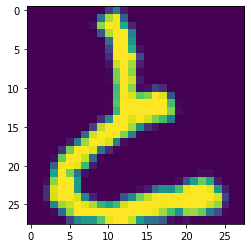

In [98]:
def show_image(index):
    sample_img = train_images.iloc[index]
    print("image class: ",train_labels.iloc[index][1])
    img = []
    for i in range(0,784, 28):
        img.append(sample_img[i:i+28])
    imgplot = plt.imshow(img)
    plt.show()
show_image(0)

<h3>There are 20 types of data which are labeled by a class number.Here is an example of every class type:</h3>

image class:  0


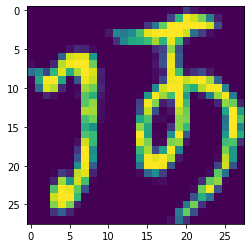

image class:  1


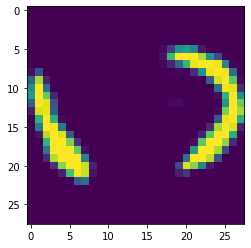

image class:  2


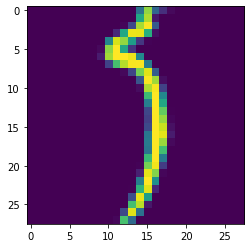

image class:  3


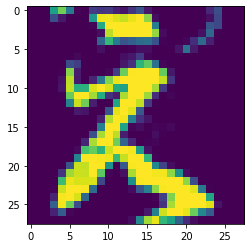

image class:  4


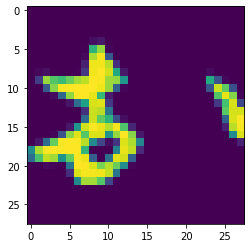

image class:  5


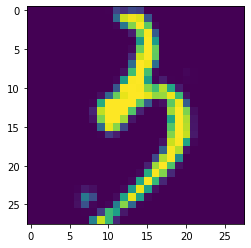

image class:  6


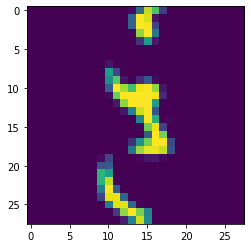

image class:  7


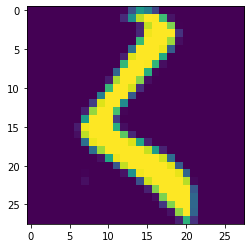

image class:  8


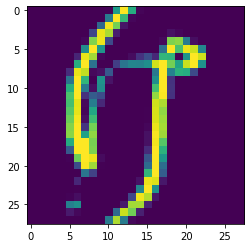

image class:  9


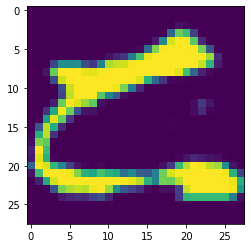

image class:  10


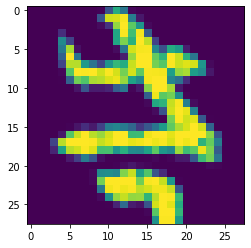

image class:  11


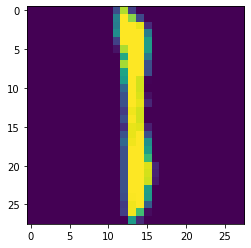

image class:  12


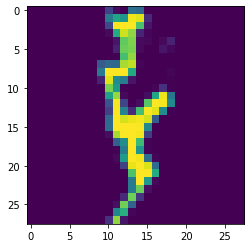

image class:  13


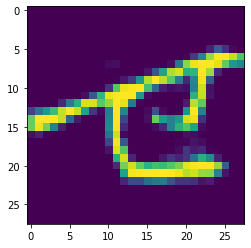

image class:  14


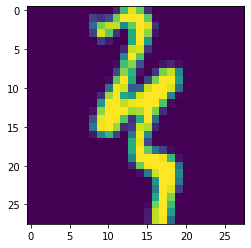

image class:  15


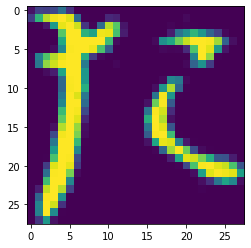

image class:  16


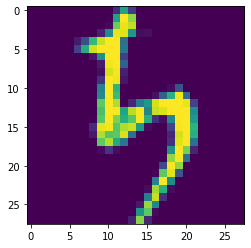

image class:  17


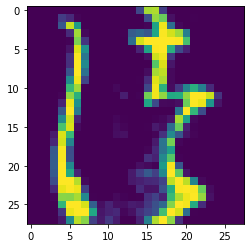

image class:  18


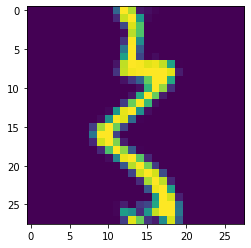

image class:  19


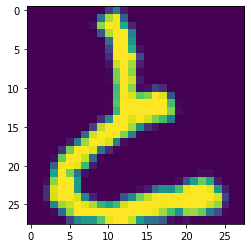

In [99]:
class_samples = {}
for i in range(len(train_labels)):
    if len(class_samples) < 20:
        if int(train_labels.iloc[i][1]) not in class_samples:
            class_samples[train_labels.iloc[i][1]] = int(train_labels.iloc[i][0]) 
    else:
        break

class_samples = sorted(class_samples.items(), key = lambda kv:(kv[0], kv[1]))

for i,idx in class_samples:
    show_image(idx)
    

<h3>how many instances of each class do we have?</h3>

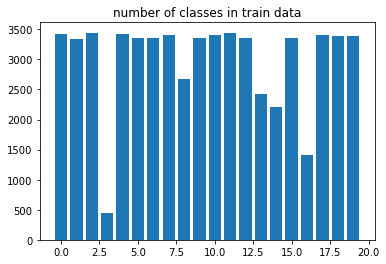

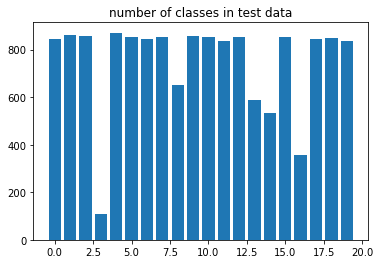

In [100]:
def show_plot_for_classes(data, title):
    train_classes = [0] * 20
    for i in range(len(data)):
        classType = data.iloc[i][1]
        train_classes[classType] += 1
        
    plt.bar(range(20), train_classes)
    plt.title(title)
    plt.show()
    
show_plot_for_classes(train_labels, 'number of classes in train data')
show_plot_for_classes(test_labels, 'number of classes in test data')

<h2>Normalizing data so that every data is between 0 and 1</h2>
<h3>Without normalizing the data, there will be some roblems when comparing the pixels with each other<br/>
the pixels minimum and maximum values differ from each other but after scaling the data, every maximum value for every column is 1 and every minimum value is 0</h3>

In [101]:
# from sklearn import preprocessing

# def normalize_data(df):
#     x = df.values 
#     min_max_scaler = preprocessing.MinMaxScaler()
#     x_scaled = min_max_scaler.fit_transform(x)
#     return pd.DataFrame(x_scaled)
    

train_images = train_images.div(255)
test_images = test_images.div(255)
train_images

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,...,0.043137,0.011765,0.043137,0.007843,0.0,0.0,0.0,0.0,0.0,0.0
1,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.090196,0.647059,0.141176,0.0,0.0,0.0,0.0,0.0,0.0
2,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,0.05098,0.196078,0.184314,0.219608,0.368627,0.141176,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.015686,0.619608,...,1.000000,0.968627,0.768627,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
59996,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
59997,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,...,1.000000,1.000000,0.298039,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
59998,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


<h1>Phase 2 (preparing classes)</h1>

<h2>Dataloader</h2>

In [102]:
class Dataloader:
    
    def __init__(self, data, labels, n_classes, batch_size=None, shuffle=False):

        assert len(data)==len(labels)
        self.__n_classes = n_classes
        self.__batch_size = batch_size
        self.__shuffle = shuffle
        self.__data = data
        self.__onehot_labels = self.__onehot(labels, self.__n_classes)
    
    def __onehot(self, labels, n_classes):
        onehot_vectors = []
        for val in labels:
            onehot_row = []
            for i in range(n_classes):
                if i == val[1]:
                    onehot_row.append(1)
                else:
                    onehot_row.append(0)
            onehot_vectors.append(onehot_row)
        onehot_vectors = np.asmatrix(onehot_vectors, dtype=float)
        return onehot_vectors
    
    def __shuffle_dataset(self):
        random_list = np.random.permutation(len(self.__data))
        self.__onehot_labels = self.__onehot_labels[random_list]
        self.__data = self.__data[random_list]

    
    def __iter__(self):
        
        if self.__shuffle:
            self.__shuffle_dataset()
            
        if self.__batch_size==None:
            yield (np.matrix(self.__data), np.matrix(self.__onehot_labels))
            return
            
        for idx in range(0, len(self.__data), self.__batch_size):
            yield (np.matrix(self.__data[idx:idx+self.__batch_size]), 
                   np.matrix(self.__onehot_labels[idx:idx+self.__batch_size]))

# Activation Functions

In [103]:
class Identical:
    
    def __init__(self): pass
    
    def __val(self, matrix):
        identical_value = np.matrix(matrix, dtype=float)
        return identical_value

    def derivative(self, matrix):
        temp = np.matrix(matrix, dtype=float)
        identical_derivative = np.matrix(np.full(np.shape(temp), 1.))
        return identical_derivative
    
    def __call__(self, matrix):
        return self.__val(matrix)
    

class Relu:
    
    def __init__(self): pass
    
    def __val(self, matrix):
        identical_value = np.matrix(matrix, dtype=float)
        relu_value = np.maximum(identical_value, 0)
        return relu_value

    def derivative(self, matrix):
        relu_derivative = np.matrix(matrix, dtype = float)
        relu_derivative[matrix>0] = 1
        relu_derivative[matrix<=0] = 0
        return relu_derivative
    
    def __call__(self, matrix):
        return self.__val(matrix)

    
class LeakyRelu:
    
    def __init__(self, negative_slope=0.01):
        self.negative_slope = 0.01
    
    def __val(self, matrix):
        matrix = np.where(matrix < 0, self.negative_slope * matrix , matrix)  
        leacky_relu_value = np.matrix(matrix, dtype=float)
        return leacky_relu_value

    def derivative(self, matrix):
        leacky_relu_derivative = np.matrix(matrix, dtype = float)
        leacky_relu_derivative[matrix<0] = self.negative_slope
        leacky_relu_derivative[matrix>=0] = 1
        return leacky_relu_derivative
    
    def __call__(self, matrix):
        return self.__val(matrix)

    
class Sigmoid:
    
    def __init__(self): pass

    def __val(self, matrix):
        Exp =  np.exp(-matrix)
        F = 1/(1 + Exp)
        return np.matrix(F, dtype = float)

    def derivative(self, matrix):
        Fx = self.__val(matrix)
        sigmoid_derivative = np.multiply(Fx, np.matrix(1 - Fx))
        return sigmoid_derivative
    
    def __call__(self, matrix):
        return self.__val(matrix)


class Softmax:
    
    def __init__(self): pass

    def __val(self, matrix):
        matrix -= matrix.max(1)
        Val = np.exp(matrix)/np.exp(matrix).sum(1)
        softmax_value = np.matrix(Val, dtype=float)
        return softmax_value
    
    def __call__(self, matrix):
        return self.__val(matrix)
    
class Tanh:
    
    def __init__(self): pass

    def __val(self, matrix):
        PosExp =  np.exp(matrix)
        NegExp =  np.exp(-matrix)
        tanh_value = (PosExp - NegExp) / (PosExp + NegExp)
        return tanh_value

    def derivative(self, matrix):
        Fx = self.__val(matrix)
        tanh_derivative = 1 - np.power(Fx, 2)
        return tanh_derivative
    
    def __call__(self, matrix):
        return self.__val(matrix)

# Loss Function

In [104]:
class CrossEntropy: #(with softmax)
    
    def __init__(self): pass

    def __val(self, true_val, expected_val):
        assert np.shape(true_val)==np.shape(expected_val)
        SoftMax = Softmax()(true_val)
        cross_entropy_value = -np.multiply(np.ma.log(SoftMax), expected_val).sum(1)
        return cross_entropy_value
        
    def derivative(self, true_val, expected_val):
        assert np.shape(true_val)==np.shape(expected_val)
        SoftMax = Softmax()(true_val)
        return SoftMax - expected_val
    
    def __call__(self, true_val, expected_val):
        return self.__val(true_val, expected_val)

# Layer

In [105]:
class Layer:

    DEFAULT_LOW, DEFAULT_HIGH, DEFAULT_MEAN, DEFAULT_VAR = 0, 0.05, 0., 1.
  
    def __init__(self, input_size, output_size, 
                 activation=Identical(), initial_weight='uniform', **initializing_parameters):
        
        assert type(initial_weight)==str, 'Undefined activation function!'
        
        self.__weight_initializer_dict = {'uniform':self.__uniform_weight, 'normal':self.__normal_weight}
        
        assert initial_weight in self.__weight_initializer_dict, 'Undefined weight initialization function!'


        self.__n_neurons = output_size
        weight_initializer = self.__weight_initializer_dict[initial_weight]
        self.__weight = weight_initializer(input_size, self.__n_neurons, **initializing_parameters)
        self.__bias = weight_initializer(1, self.__n_neurons, **initializing_parameters)
        self.__activation = activation
        
        self.__last_input = None
        self.__last_activation_input = None
        self.__last_activation_output = None
        self.__last_activation_derivative = None
    
    
    def forward(self, layer_input):
        assert np.ndim(layer_input)==2        
        assert np.size(self.__weight,0) == np.size(layer_input,1)
        self.__last_input = layer_input
        activation_input = np.matmul(layer_input, self.__weight) + self.__bias
        self.__last_activation_input = activation_input
        self.__last_activation_output = self.__activation(activation_input)
        self.__last_activation_derivative = self.__activation.derivative(activation_input)
        return self.__last_activation_output
    
    def set_weights_and_biases(self, lr, BU, Ws):
        self.__bias -= lr * BU
        self.__weight -= lr * Ws
        
    def update_weights(self, backprop_tensor, lr):
        assert np.ndim(backprop_tensor)==2
        assert np.size(backprop_tensor,0) == np.size(self.__last_activation_derivative,0)
        assert np.size(backprop_tensor,1) == self.__n_neurons
       
        input_after_transposion = self.__last_input.transpose()
        last_derivative = self.__last_activation_derivative
        Ys = np.multiply(backprop_tensor, last_derivative)
        Ws = np.matmul(input_after_transposion, Ys)
        weights_after_transposion = self.__weight.transpose()
        backprop_tensor = np.matmul(Ys, weights_after_transposion)
        BU = np.matmul(np.matrix(np.tile(1, (1, Ys.shape[0]))),Ys)
        self.set_weights_and_biases(lr, BU, Ws)
        
        return backprop_tensor

    def __uniform_weight(self, dim1, dim2, **initializing_parameters):
        low, high = self.DEFAULT_LOW, self.DEFAULT_HIGH
        if 'low' in initializing_parameters.keys(): low = initializing_parameters['low']
        if 'high' in initializing_parameters.keys(): high = initializing_parameters['high']
            
        uniformed_weights = np.random.uniform(low, high, size=(dim1, dim2))

        return uniformed_weights

    def __normal_weight(self, dim1, dim2, **initializing_parameters):
        mean, var = self.DEFAULT_MEAN, self.DEFAULT_VAR
        if 'mean' in initializing_parameters.keys(): mean = initializing_parameters['mean']
        if 'var' in initializing_parameters.keys(): var = initializing_parameters['var']
       
        normalized_weights = np.random.normal(mean, np.sqrt(var), size=(dim1, dim2))
        
        return normalized_weights
    
    
    @property
    def n_neurons(self): return self.__n_neurons
    
    @property
    def weight(self): return self.__weight
    
    @property
    def bias(self): return self.__bias
    
    @property
    def activation(self): return self.__activation

# Feed Forward Neural Network

In [106]:
class FeedForwardNN:
    
    def __init__(self, input_shape):
        
        self.__input_shape = input_shape
        self.__output_shape = None
        
        self.__layers_list = []
        
        self.__lr = None
        self.__loss = None

        
    def add_layer(self, n_neurons, activation=Relu(), initial_weight='uniform', **initializing_parameters):
         
        assert type(n_neurons)==int, "Invalid number of neurons for the layer!"
        assert n_neurons>0, "Invalid number of neurons for the layer!"
        
        n_prev_neurons = self.__input_shape if len(self.__layers_list)==0 else self.__layers_list[-1].n_neurons
        new_layer = Layer(n_prev_neurons, n_neurons, activation, initial_weight, **initializing_parameters)
        self.__layers_list.append(new_layer)
        self.__output_shape = self.__layers_list[-1].n_neurons 
      
    
    def set_training_param(self, loss=CrossEntropy(), lr=1e-3):
        assert self.__layers_list, "Uncomplete model!"
        self.__loss = loss
        self.__lr = lr
    
    
    def forward(self, network_input):
        assert type(self.__output_shape) != None, "Model is not compiled!"

        network_output = network_input
        for layer in self.__layers_list:
            tmp = layer.forward(network_output)
            network_output = tmp
            
        return network_output
    
    
    def fit(self, epochs, trainloader, testloader=None, print_results=True):
        
        assert type(self.__output_shape) != None, "Model is not compiled!"
        assert type(self.__lr) != None and type(self.__loss) != None, "Training paramenters are not set!"

        log = {"train_accuracy":[], "train_loss":[], "test_accuracy":[], "test_loss":[]}
        
        for epoch in range(1, epochs+1):
            
            if print_results: 
                print('Epoch {}:'.format(epoch)) 
                
            average_accuracy, average_loss = self.__train(trainloader)
            log['train_accuracy'].append(average_accuracy)
            log['train_loss'].append(average_loss)
            if print_results:
                print('\tTrain: Average Accuracy: {}\tAverage Loss: {}'.format(average_accuracy, average_loss))
            
            if type(testloader) != type(None):
                average_accuracy, average_loss = self.__test(testloader)
                log['test_accuracy'].append(average_accuracy)
                log['test_loss'].append(average_loss)
                if print_results:
                    print('\tTest: Average Accuracy: {}\tAverage Loss: {}'.format(average_accuracy, average_loss))
                    
        return log
    
    
    def __train(self, trainloader):
        batch_accuracies, batch_losses = [], []
        for x_train, y_train in trainloader:
            batch_accuracy, batch_loss = self.__train_on_batch(x_train, y_train)
            batch_accuracies.append(batch_accuracy)
            batch_losses.append(batch_loss)
        accuracies_mean = np.mean(batch_accuracies)
        losses_mean = np.mean(batch_losses)
        return accuracies_mean, losses_mean
    
    
    def __test(self, testloader):
        batch_accuracies, batch_losses = [], []
        for x_test, y_test in testloader:
            batch_accuracy, batch_loss = self.__test_on_batch(x_test, y_test)
            batch_accuracies.append(batch_accuracy)
            batch_losses.append(batch_loss)
        accuracies_mean = np.mean(batch_accuracies)
        losses_mean = np.mean(batch_losses)
        return accuracies_mean, losses_mean

    
    def __train_on_batch(self, x_batch, y_batch):
        y_pred = self.forward(x_batch)
        batch_accuracy = self.__compute_accuracy(y_pred,y_batch)
        batch_average_loss = self.calc_batch_avg_loss(y_pred, y_batch) 
        self.__update_weights(y_pred, y_batch)
        return (batch_accuracy, batch_average_loss)
        
        
    def __test_on_batch(self, x_batch, y_batch):
        cross_entropy = CrossEntropy()
        
        y_pred = self.forward(x_batch)
        batch_accuracy = self.__compute_accuracy(y_pred,y_batch)
        

        batch_loss = cross_entropy(y_pred, y_batch)
        batch_average_loss = np.sum(batch_loss)/len(y_pred)
        
        return (batch_accuracy, batch_average_loss)
            
        
    def __get_labels(self, outputs):
        return outputs.argmax(axis=1)
    
    def find_final_answers(self, answers):
        y_pred = []
        for results in answers:
            max_num = results[0]
            index = 0
            for i in range(1,len(results)):
                if results[i] > max_num:
                    max_num = results[i]
                    index = i
            y_pred.append(index)
        
        return y_pred
    
    def __compute_accuracy(self, output, expected_output):
        output = np.array(output)
        expected_output = np.array(expected_output)
        
        y_pred = self.find_final_answers(output)
        y_expect = self.find_final_answers(expected_output)
        
        data_len = len(y_pred)
        corrects = 0
        for i in range(len(y_pred)):
            if y_pred[i] == y_expect[i]:
                corrects += 1

        accuracy = (corrects/data_len)*100
        
        return accuracy
    
    def calc_avg(self, MyList, Len):
        Sum = 0
        for i in MyList:
            Sum += i
        return Sum / Len
            

    def calc_batch_avg_loss(self, output, y_batch):
        crossEntropy = CrossEntropy()
        batch_loss = crossEntropy(output, y_batch)
        batch_average_loss = self.calc_avg(batch_loss, len(output))
        return batch_average_loss
    
    
    def __update_weights(self, output, y_batch):
        crossEntropy = CrossEntropy()
        temp = crossEntropy.derivative(output, y_batch)
        for i in reversed(self.__layers_list):
            temp = i.update_weights(temp, self.__lr)
        return

<h1>Learning rate = 0.001</h1>

In [107]:
# Sample code for building and training a model
INPUT_SHAPE = 784
LEARNING_RATE = 0.001
EPOCHS = 20
TRAINLOADER = []
TESTLOADER = []

train_loader = Dataloader(train_images.to_numpy(), train_labels.to_numpy(), 20, batch_size=64, shuffle=True)
for i in train_loader:
    TRAINLOADER.append(i)

test_loader = Dataloader(test_images.to_numpy(), test_labels.to_numpy(), 20, batch_size=64, shuffle=True)
for i in test_loader:
    TESTLOADER.append(i)

network = FeedForwardNN(INPUT_SHAPE)
network.add_layer(30, input_shape=INPUT_SHAPE, activation=Relu(), weight_initializer='uniform')
network.add_layer(20, activation=Identical(), weight_initializer='uniform')
network.set_training_param(loss=CrossEntropy(), lr=LEARNING_RATE)

log = network.fit(EPOCHS, TRAINLOADER, TESTLOADER)

Epoch 1:
	Train: Average Accuracy: 57.50099946695096	Average Loss: 1.4908499264720458
	Test: Average Accuracy: 62.675088652482266	Average Loss: 1.323681917894428
Epoch 2:
	Train: Average Accuracy: 75.86453891257996	Average Loss: 0.8739146052585689
	Test: Average Accuracy: 67.20079787234043	Average Loss: 1.1910142209453507
Epoch 3:
	Train: Average Accuracy: 78.99953358208955	Average Loss: 0.7660901329900645
	Test: Average Accuracy: 69.23758865248227	Average Loss: 1.1182839078784756
Epoch 4:
	Train: Average Accuracy: 80.97847814498934	Average Loss: 0.6937722193167215
	Test: Average Accuracy: 71.34530141843973	Average Loss: 1.0472842285951747
Epoch 5:
	Train: Average Accuracy: 82.6192697228145	Average Loss: 0.6337033678922097
	Test: Average Accuracy: 72.91001773049645	Average Loss: 0.9859125879077246
Epoch 6:
	Train: Average Accuracy: 83.91524520255864	Average Loss: 0.5861488181877588
	Test: Average Accuracy: 74.21764184397165	Average Loss: 0.9413136077394285
Epoch 7:
	Train: Average Accu

<h1>Learning rate = 0.01</h1>

In [108]:
INPUT_SHAPE = 784
LEARNING_RATE = 0.01
EPOCHS = 20
TRAINLOADER = []
TESTLOADER = []

train_loader = Dataloader(train_images.to_numpy(), train_labels.to_numpy(), 20, batch_size=64, shuffle=True)
for i in train_loader:
    TRAINLOADER.append(i)

test_loader = Dataloader(test_images.to_numpy(), test_labels.to_numpy(), 20, batch_size=64, shuffle=True)
for i in test_loader:
    TESTLOADER.append(i)

network = FeedForwardNN(INPUT_SHAPE)
network.add_layer(30, input_shape=INPUT_SHAPE, activation=Relu(), weight_initializer='uniform')
network.add_layer(20, activation=Identical(), weight_initializer='uniform')
network.set_training_param(loss=CrossEntropy(), lr=LEARNING_RATE)

log = network.fit(EPOCHS, TRAINLOADER, TESTLOADER)

Epoch 1:
	Train: Average Accuracy: 5.798574093816631	Average Loss: 2.9682968912142105
	Test: Average Accuracy: 10.886524822695034	Average Loss: 2.8359778849149055
Epoch 2:
	Train: Average Accuracy: 16.17637260127932	Average Loss: 2.5575944367465904
	Test: Average Accuracy: 21.274379432624112	Average Loss: 2.467745603671289
Epoch 3:
	Train: Average Accuracy: 22.621268656716417	Average Loss: 2.3974961942228474
	Test: Average Accuracy: 21.498226950354614	Average Loss: 2.4994990823331764
Epoch 4:
	Train: Average Accuracy: 29.795775586353944	Average Loss: 2.229727744447194
	Test: Average Accuracy: 34.182180851063826	Average Loss: 2.2489447790839034
Epoch 5:
	Train: Average Accuracy: 42.745535714285715	Average Loss: 1.927058695995394
	Test: Average Accuracy: 35.890957446808514	Average Loss: 2.244888526480328
Epoch 6:
	Train: Average Accuracy: 43.90325159914712	Average Loss: 1.8771978129846134
	Test: Average Accuracy: 38.402039007092206	Average Loss: 2.199383350328297
Epoch 7:
	Train: Average

<h1>Learning rate = 0.0001</h1>

In [109]:
INPUT_SHAPE = 784
LEARNING_RATE = 0.0001
EPOCHS = 20
TRAINLOADER = []
TESTLOADER = []

train_loader = Dataloader(train_images.to_numpy(), train_labels.to_numpy(), 20, batch_size=64, shuffle=True)
for i in train_loader:
    TRAINLOADER.append(i)

test_loader = Dataloader(test_images.to_numpy(), test_labels.to_numpy(), 20, batch_size=64, shuffle=True)
for i in test_loader:
    TESTLOADER.append(i)

network = FeedForwardNN(INPUT_SHAPE)
network.add_layer(30, input_shape=INPUT_SHAPE, activation=Relu(), weight_initializer='uniform')
network.add_layer(20, activation=Identical(), weight_initializer='uniform')
network.set_training_param(loss=CrossEntropy(), lr=LEARNING_RATE)

log = network.fit(EPOCHS, TRAINLOADER, TESTLOADER)

Epoch 1:
	Train: Average Accuracy: 12.1102078891258	Average Loss: 2.8405232609876507
	Test: Average Accuracy: 18.91622340425532	Average Loss: 2.6348924633595745
Epoch 2:
	Train: Average Accuracy: 41.752731876332625	Average Loss: 2.226457327984493
	Test: Average Accuracy: 43.976063829787236	Average Loss: 2.0651062743997537
Epoch 3:
	Train: Average Accuracy: 59.05683635394456	Average Loss: 1.5870070972034294
	Test: Average Accuracy: 50.34352836879433	Average Loss: 1.7156033927929264
Epoch 4:
	Train: Average Accuracy: 64.58055703624734	Average Loss: 1.2910518968528857
	Test: Average Accuracy: 54.82269503546099	Average Loss: 1.564530411305433
Epoch 5:
	Train: Average Accuracy: 67.9820762260128	Average Loss: 1.1580408951732475
	Test: Average Accuracy: 57.52216312056737	Average Loss: 1.4773822704436725
Epoch 6:
	Train: Average Accuracy: 70.09095149253731	Average Loss: 1.0799968658683052
	Test: Average Accuracy: 59.55230496453901	Average Loss: 1.4178762129362363
Epoch 7:
	Train: Average Accur

<p><h3>The amount that the weights are updated during training is referred to as the step size or the “learning rate.”<br/><br/>
    By both increasing and decreasing the the learning rate to 0.01 and 0.0001 the average accuracy decreases.<br/><br/>Choosing the learning rate is challenging as a value too small may result in a long training process that could get stuck, whereas a value too large may result in learning a sub-optimal set of weights too fast or an unstable training process.<br/><br/>
  The learning rate controls how quickly the model is adapted to the problem. Smaller learning rates require more training epochs given the smaller changes made to the weights each update, whereas larger learning rates result in rapid changes and require fewer training epochs.
</h3>
</p>

<h1>Part 4 (changing activation function) </h1>
<h3>Activation function = sigmoid</h3>

In [110]:
INPUT_SHAPE = 784
LEARNING_RATE = 0.001
EPOCHS = 20
TRAINLOADER = []
TESTLOADER = []

train_loader = Dataloader(train_images.to_numpy(), train_labels.to_numpy(), 20, batch_size=64, shuffle=True)
for i in train_loader:
    TRAINLOADER.append(i)

test_loader = Dataloader(test_images.to_numpy(), test_labels.to_numpy(), 20, batch_size=64, shuffle=True)
for i in test_loader:
    TESTLOADER.append(i)

network = FeedForwardNN(INPUT_SHAPE)
network.add_layer(30, input_shape=INPUT_SHAPE, activation=Sigmoid(), weight_initializer='uniform')
network.add_layer(20, activation=Identical(), weight_initializer='uniform')
network.set_training_param(loss=CrossEntropy(), lr=LEARNING_RATE)

log = network.fit(EPOCHS, TRAINLOADER, TESTLOADER)

Epoch 1:
	Train: Average Accuracy: 6.681436567164179	Average Loss: 2.9451716013638993
	Test: Average Accuracy: 13.747783687943263	Average Loss: 2.895613687887696
Epoch 2:
	Train: Average Accuracy: 18.92490671641791	Average Loss: 2.6505486141424477
	Test: Average Accuracy: 24.61436170212766	Average Loss: 2.487274068408641
Epoch 3:
	Train: Average Accuracy: 37.953091684434966	Average Loss: 2.1359397079783506
	Test: Average Accuracy: 37.783687943262414	Average Loss: 2.0583969762067302
Epoch 4:
	Train: Average Accuracy: 54.52258795309169	Average Loss: 1.6703638778865844
	Test: Average Accuracy: 49.17331560283689	Average Loss: 1.762519251642017
Epoch 5:
	Train: Average Accuracy: 64.84541577825159	Average Loss: 1.3455418058087707
	Test: Average Accuracy: 55.30806737588652	Average Loss: 1.5538679813401899
Epoch 6:
	Train: Average Accuracy: 69.7128198294243	Average Loss: 1.1406037668078508
	Test: Average Accuracy: 59.403812056737586	Average Loss: 1.4191938396399633
Epoch 7:
	Train: Average Acc

<h3>Activation function = ‫‪Hyperbolic‬‬ ‫‪Tangent‬‬</h3>

In [111]:
INPUT_SHAPE = 784
LEARNING_RATE = 0.001
EPOCHS = 20
TRAINLOADER = []
TESTLOADER = []

train_loader = Dataloader(train_images.to_numpy(), train_labels.to_numpy(), 20, batch_size=64, shuffle=True)
for i in train_loader:
    TRAINLOADER.append(i)

test_loader = Dataloader(test_images.to_numpy(), test_labels.to_numpy(), 20, batch_size=64, shuffle=True)
for i in test_loader:
    TESTLOADER.append(i)

network = FeedForwardNN(INPUT_SHAPE)
network.add_layer(30, input_shape=INPUT_SHAPE, activation=Tanh(), weight_initializer='uniform')
network.add_layer(20, activation=Identical(), weight_initializer='uniform')
network.set_training_param(loss=CrossEntropy(), lr=LEARNING_RATE)

log = network.fit(EPOCHS, TRAINLOADER, TESTLOADER)

Epoch 1:
	Train: Average Accuracy: 9.541577825159914	Average Loss: 2.860345834460389
	Test: Average Accuracy: 20.616134751773046	Average Loss: 2.558255065141941
Epoch 2:
	Train: Average Accuracy: 42.26412579957356	Average Loss: 1.9285411449521799
	Test: Average Accuracy: 48.05629432624114	Average Loss: 1.7902886488124272
Epoch 3:
	Train: Average Accuracy: 66.1863672707889	Average Loss: 1.2478371500315395
	Test: Average Accuracy: 58.982712765957444	Average Loss: 1.4327121963572715
Epoch 4:
	Train: Average Accuracy: 71.94829424307036	Average Loss: 1.0047573930218168
	Test: Average Accuracy: 62.327127659574465	Average Loss: 1.3090925886544773
Epoch 5:
	Train: Average Accuracy: 74.66684434968018	Average Loss: 0.8992011879417592
	Test: Average Accuracy: 63.76994680851064	Average Loss: 1.252603448681232
Epoch 6:
	Train: Average Accuracy: 76.02445362473348	Average Loss: 0.8434262548617075
	Test: Average Accuracy: 65.02659574468085	Average Loss: 1.219982448070617
Epoch 7:
	Train: Average Accur

<h3>Activation function = ‫‪‫‪Leaky‬‬ ‫‪Relu‬‬‬‬</h3>

In [112]:
INPUT_SHAPE = 784
LEARNING_RATE = 0.001
EPOCHS = 20
TRAINLOADER = []
TESTLOADER = []

train_loader = Dataloader(train_images.to_numpy(), train_labels.to_numpy(), 20, batch_size=64, shuffle=True)
for i in train_loader:
    TRAINLOADER.append(i)

test_loader = Dataloader(test_images.to_numpy(), test_labels.to_numpy(), 20, batch_size=64, shuffle=True)
for i in test_loader:
    TESTLOADER.append(i)

network = FeedForwardNN(INPUT_SHAPE)
network.add_layer(30, input_shape=INPUT_SHAPE, activation=LeakyRelu(), weight_initializer='uniform')
network.add_layer(20, activation=Identical(), weight_initializer='uniform')
network.set_training_param(loss=CrossEntropy(), lr=LEARNING_RATE)

log = network.fit(EPOCHS, TRAINLOADER, TESTLOADER)

Epoch 1:
	Train: Average Accuracy: 58.079024520255864	Average Loss: 1.4820023207877435
	Test: Average Accuracy: 63.495124113475185	Average Loss: 1.3148684726340873
Epoch 2:
	Train: Average Accuracy: 76.88899253731343	Average Loss: 0.8462246507687322
	Test: Average Accuracy: 68.34663120567376	Average Loss: 1.1505876577609129
Epoch 3:
	Train: Average Accuracy: 80.47707889125799	Average Loss: 0.724933719961407
	Test: Average Accuracy: 70.53856382978724	Average Loss: 1.0707530887230774
Epoch 4:
	Train: Average Accuracy: 82.18949893390192	Average Loss: 0.6552886647881446
	Test: Average Accuracy: 72.12765957446808	Average Loss: 1.0114579855071257
Epoch 5:
	Train: Average Accuracy: 83.57709221748401	Average Loss: 0.6045949176032804
	Test: Average Accuracy: 73.49069148936171	Average Loss: 0.9634910857346884
Epoch 6:
	Train: Average Accuracy: 84.5748933901919	Average Loss: 0.565721902942233
	Test: Average Accuracy: 74.22207446808511	Average Loss: 0.9293307316345193
Epoch 7:
	Train: Average Accu

<p><h3>The two activaion functions Relu and LeakyRelu almost have the same accuracies but in our data set, the Relu activation function has a better result.<br/><br/>
advantage of leakyRelu over Relu is that with a Leaky ReLU (LReLU), you won’t face the “dead ReLU” (or “dying ReLU”) problem which happens when your ReLU always have values under 0 - this completely blocks learning in the ReLU because of gradients of 0 in the negative part<br/><br/>
Tanh and sigmoid activation functions do not have good results in our dataset because they have the vanishing gradient problem which means that in very large values the output becomes close to 1 and at very small values the output becomes close to 0 so the derivative of these functions become more close to 0 therefore there will not be updated.
</h3>
</p>

<h1>Part 5 (changing batch size) </h1>
<h3>batch size = 16</h3>

In [113]:
INPUT_SHAPE = 784
LEARNING_RATE = 0.001
EPOCHS = 20
TRAINLOADER = []
TESTLOADER = []

train_loader = Dataloader(train_images.to_numpy(), train_labels.to_numpy(), 20, batch_size=16, shuffle=True)
for i in train_loader:
    TRAINLOADER.append(i)

test_loader = Dataloader(test_images.to_numpy(), test_labels.to_numpy(), 20, batch_size=16, shuffle=True)
for i in test_loader:
    TESTLOADER.append(i)

network = FeedForwardNN(INPUT_SHAPE)
network.add_layer(30, input_shape=INPUT_SHAPE, activation=Relu(), weight_initializer='uniform')
network.add_layer(20, activation=Identical(), weight_initializer='uniform')
network.set_training_param(loss=CrossEntropy(), lr=LEARNING_RATE)

log = network.fit(EPOCHS, TRAINLOADER, TESTLOADER)

Epoch 1:
	Train: Average Accuracy: 57.785	Average Loss: 1.4646714730279815
	Test: Average Accuracy: 62.36673773987207	Average Loss: 1.3434538558025746
Epoch 2:
	Train: Average Accuracy: 76.12333333333333	Average Loss: 0.868584529362888
	Test: Average Accuracy: 66.41124733475479	Average Loss: 1.2125383771173401
Epoch 3:
	Train: Average Accuracy: 78.81333333333333	Average Loss: 0.7716814596640034
	Test: Average Accuracy: 68.51679104477611	Average Loss: 1.1415497776680064
Epoch 4:
	Train: Average Accuracy: 80.57666666666667	Average Loss: 0.7085014266287779
	Test: Average Accuracy: 70.1159381663113	Average Loss: 1.0848115812161983
Epoch 5:
	Train: Average Accuracy: 82.09666666666666	Average Loss: 0.6552034360384781
	Test: Average Accuracy: 71.74840085287846	Average Loss: 1.0343630351862436
Epoch 6:
	Train: Average Accuracy: 83.28666666666666	Average Loss: 0.6135379858556709
	Test: Average Accuracy: 72.60127931769723	Average Loss: 0.9982367506471291
Epoch 7:
	Train: Average Accuracy: 84.013

<h3>batch size = 32</h3>

In [114]:
INPUT_SHAPE = 784
LEARNING_RATE = 0.001
EPOCHS = 20
TRAINLOADER = []
TESTLOADER = []

train_loader = Dataloader(train_images.to_numpy(), train_labels.to_numpy(), 20, batch_size=32, shuffle=True)
for i in train_loader:
    TRAINLOADER.append(i)

test_loader = Dataloader(test_images.to_numpy(), test_labels.to_numpy(), 20, batch_size=32, shuffle=True)
for i in test_loader:
    TESTLOADER.append(i)

network = FeedForwardNN(INPUT_SHAPE)
network.add_layer(30, input_shape=INPUT_SHAPE, activation=Relu(), weight_initializer='uniform')
network.add_layer(20, activation=Identical(), weight_initializer='uniform')
network.set_training_param(loss=CrossEntropy(), lr=LEARNING_RATE)

log = network.fit(EPOCHS, TRAINLOADER, TESTLOADER)

Epoch 1:
	Train: Average Accuracy: 57.86	Average Loss: 1.4748773494327256
	Test: Average Accuracy: 63.506130063965884	Average Loss: 1.315746385669476
Epoch 2:
	Train: Average Accuracy: 75.94333333333333	Average Loss: 0.8747905337615551
	Test: Average Accuracy: 67.32187277896233	Average Loss: 1.18294188943232
Epoch 3:
	Train: Average Accuracy: 79.205	Average Loss: 0.7655519387748474
	Test: Average Accuracy: 69.98711798152097	Average Loss: 1.1013712901302037
Epoch 4:
	Train: Average Accuracy: 81.22333333333333	Average Loss: 0.6921086028232287
	Test: Average Accuracy: 71.41746624022743	Average Loss: 1.0472004538874065
Epoch 5:
	Train: Average Accuracy: 82.605	Average Loss: 0.641463974728801
	Test: Average Accuracy: 72.60350035536602	Average Loss: 1.0090978350048032
Epoch 6:
	Train: Average Accuracy: 83.63166666666666	Average Loss: 0.602406100030502
	Test: Average Accuracy: 73.49191542288558	Average Loss: 0.979956713869708
Epoch 7:
	Train: Average Accuracy: 84.43	Average Loss: 0.5695037172

<h3>batch size = 256</h3>

In [115]:
INPUT_SHAPE = 784
LEARNING_RATE = 0.001
EPOCHS = 20
TRAINLOADER = []
TESTLOADER = []

train_loader = Dataloader(train_images.to_numpy(), train_labels.to_numpy(), 20, batch_size=256, shuffle=True)
for i in train_loader:
    TRAINLOADER.append(i)

test_loader = Dataloader(test_images.to_numpy(), test_labels.to_numpy(), 20, batch_size=256, shuffle=True)
for i in test_loader:
    TESTLOADER.append(i)

network = FeedForwardNN(INPUT_SHAPE)
network.add_layer(30, input_shape=INPUT_SHAPE, activation=Relu(), weight_initializer='uniform')
network.add_layer(20, activation=Identical(), weight_initializer='uniform')
network.set_training_param(loss=CrossEntropy(), lr=LEARNING_RATE)

log = network.fit(EPOCHS, TRAINLOADER, TESTLOADER)

Epoch 1:
	Train: Average Accuracy: 46.62289450354609	Average Loss: 1.9452103000401753
	Test: Average Accuracy: 58.07558820249777	Average Loss: 1.4747962826588017
Epoch 2:
	Train: Average Accuracy: 74.73293439716313	Average Loss: 0.897649233194437
	Test: Average Accuracy: 66.66933820249777	Average Loss: 1.1893211507121595
Epoch 3:
	Train: Average Accuracy: 79.68528368794325	Average Loss: 0.7284838063290497
	Test: Average Accuracy: 69.99993030776093	Average Loss: 1.0765891687039502
Epoch 4:
	Train: Average Accuracy: 82.09496897163122	Average Loss: 0.6481000676191437
	Test: Average Accuracy: 72.01089986619091	Average Loss: 1.0094941380225597
Epoch 5:
	Train: Average Accuracy: 83.54942375886526	Average Loss: 0.596150736815669
	Test: Average Accuracy: 73.25560325602142	Average Loss: 0.9665068627020158
Epoch 6:
	Train: Average Accuracy: 84.54953457446808	Average Loss: 0.5594168642901856
	Test: Average Accuracy: 74.4229482604817	Average Loss: 0.9350547918794954
Epoch 7:
	Train: Average Accura

<p><h3>
The best result can be achieved with batch size 256.<br/><br/>
using a batch equal to the entire dataset guarantees convergence to the global optima of the objective function. However, this is at the cost of slower, empirical convergence to that optima. On the other hand, using smaller batch sizes have been empirically shown to have faster convergence to “good” solutions. This is intuitively explained by the fact that smaller batch sizes allow the model to “start learning before having to see all the data.” The downside of using a smaller batch size is that the model is not guaranteed to converge to the global optima.

</h3></p>

<h1>Part 6(changing epoch)</h1>
<p><h3>
An epoch means training the neural network with all the training data for one cycle. In an epoch, we use all of the data exactly once.<br/><br/>
passing the entire dataset through a neural network is not enough. And we need to pass the full dataset multiple times to the same neural network. But keep in mind that we are using a limited dataset and to optimise the learning and the graph we are using Gradient Descent which is an iterative process. So, updating the weights with single pass or one epoch is not enough.<br/><br/>
As the number of epochs increases, more number of times the weight are changed in the neural network and the curve goes from underfitting to optimal to overfitting curve.
</h3></p>

In [119]:
INPUT_SHAPE = 784
LEARNING_RATE = 0.001
EPOCHS = 100
TRAINLOADER = []
TESTLOADER = []

train_loader = Dataloader(train_images.to_numpy(), train_labels.to_numpy(), 20, batch_size=256, shuffle=True)
for i in train_loader:
    TRAINLOADER.append(i)

test_loader = Dataloader(test_images.to_numpy(), test_labels.to_numpy(), 20, batch_size=256, shuffle=True)
for i in test_loader:
    TESTLOADER.append(i)

network = FeedForwardNN(INPUT_SHAPE)
network.add_layer(30, input_shape=INPUT_SHAPE, activation=Relu(), weight_initializer='uniform')
network.add_layer(20, activation=Identical(), weight_initializer='uniform')
network.set_training_param(loss=CrossEntropy(), lr=LEARNING_RATE)

epochlog = network.fit(EPOCHS, TRAINLOADER, TESTLOADER)

Epoch 1:
	Train: Average Accuracy: 51.822916666666664	Average Loss: 1.730927505209717
	Test: Average Accuracy: 62.262001003568244	Average Loss: 1.3177945913051745
Epoch 2:
	Train: Average Accuracy: 76.34862588652483	Average Loss: 0.8540837750624195
	Test: Average Accuracy: 68.61166090544157	Average Loss: 1.1157524021447358
Epoch 3:
	Train: Average Accuracy: 80.76906028368793	Average Loss: 0.7076806316254403
	Test: Average Accuracy: 71.18156222123105	Average Loss: 1.0302209167007823
Epoch 4:
	Train: Average Accuracy: 82.68118351063829	Average Loss: 0.6339264416499825
	Test: Average Accuracy: 72.75068298394291	Average Loss: 0.9770050539507252
Epoch 5:
	Train: Average Accuracy: 84.05197251773049	Average Loss: 0.5862438098255907
	Test: Average Accuracy: 73.8298673059768	Average Loss: 0.9408901679718805
Epoch 6:
	Train: Average Accuracy: 84.95678191489361	Average Loss: 0.5521570715902973
	Test: Average Accuracy: 74.61146576717216	Average Loss: 0.9126959246964093
Epoch 7:
	Train: Average Acc

	Test: Average Accuracy: 78.18493532560215	Average Loss: 0.8931802726588477
Epoch 52:
	Train: Average Accuracy: 91.4239804964539	Average Loss: 0.30494317081451267
	Test: Average Accuracy: 78.10548617305977	Average Loss: 0.8963796783350572
Epoch 53:
	Train: Average Accuracy: 91.4588874113475	Average Loss: 0.30344650305677345
	Test: Average Accuracy: 78.12081846565566	Average Loss: 0.8988296781906182
Epoch 54:
	Train: Average Accuracy: 91.49711879432623	Average Loss: 0.3020061266176334
	Test: Average Accuracy: 78.07447312667261	Average Loss: 0.9031517360320772
Epoch 55:
	Train: Average Accuracy: 91.53202570921985	Average Loss: 0.3005937009488359
	Test: Average Accuracy: 78.00826549955397	Average Loss: 0.9066520864848511
Epoch 56:
	Train: Average Accuracy: 91.55363475177305	Average Loss: 0.2993899508771737
	Test: Average Accuracy: 78.07238235950045	Average Loss: 0.9095620754774464
Epoch 57:
	Train: Average Accuracy: 91.61015070921985	Average Loss: 0.298046692492582
	Test: Average Accuracy

In [120]:
def show_plot_diagram(Log, feature1, feature2, YLim):
    plt.plot(Log[feature1], label='Train', color = 'lightgreen')
    plt.plot(Log[feature2], label='Test', color = 'darkblue')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.xlim(0, 100)
    plt.ylim(YLim[0],YLim[1])
    plt.show()

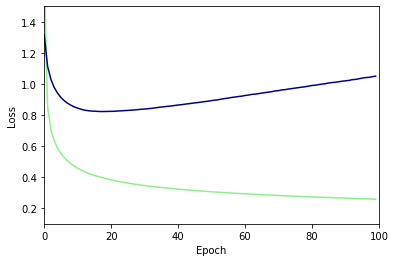

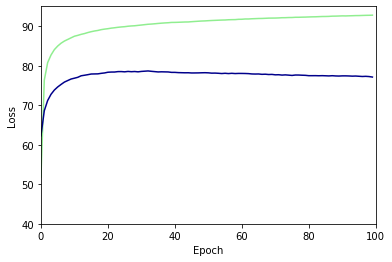

In [121]:
show_plot_diagram(epochlog, "train_loss", "test_loss", [0.1, 1.5])
show_plot_diagram(epochlog, "train_accuracy", "test_accuracy", [40, 95])

<p><h3>
as we see from the diagrams, it is not always good to increase the epoch. and after a while theoverfitting happens and the accuracy of train data increasesbut the accuracy of test data decreases.<br/><br/>
We can find the epoch in which the test accuracy is maximum by changing the epochs and showing the diagram. It can be predictable so the best epoch can be found out
</h3></p>